# HW 05, Анисимова Карина

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

In [2]:
def intervals_a(n, sigma, gamma):
    X = np.random.default_rng().normal(0, sigma, n)
    X_squared_sum = (X ** 2).sum()
    first = chi2.ppf((1 + gamma) / 2, n, 0, sigma)
    second = chi2.ppf((1 - gamma) / 2, n, 0, sigma)
    return (X_squared_sum / second) - (X_squared_sum / first)

def intervals_b(n, sigma, gamma):
    X = np.random.default_rng().normal(0, sigma, n)
    X_squared_sum = np.mean(X) ** 2
    first = norm.ppf((3 + gamma) / 4, 0, sigma) ** 2
    second = norm.ppf((3 - gamma) / 4, 0, sigma) ** 2
    return (n * X_squared_sum / second) - (n * X_squared_sum / first)

In [3]:
def build_result(ns, sigma, gamma, iterations):
    result_a = []
    result_b = []
    for n in ns:
        r = [intervals_a(n, sigma, gamma) for _ in range(iterations)]
        result_a.append(np.mean(np.array(r)))
        r = [intervals_b(n, sigma, gamma) for _ in range(iterations)]
        result_b.append(np.mean(np.array(r)))
    return result_a, result_b

def build_plot(ns, sigma, gamma, iterations): 
    result_a, result_b = build_result(ns, sigma, gamma, iterations)
    
    plt.title('Result A')
    plt.grid()
    plt.ylabel('Statistic')
    plt.xlabel('Length of interval')
    plt.plot(ns, result_a)
    plt.show()
    
    plt.title('Result B')
    plt.grid()
    plt.ylabel('Statistic')
    plt.xlabel('Length of interval') 
    plt.plot(ns, result_b)
    plt.show()

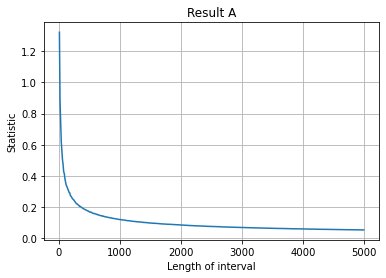

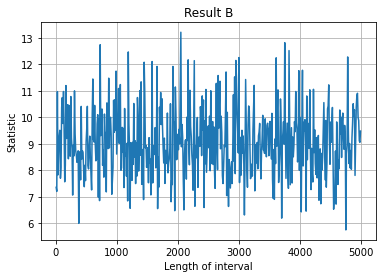

In [4]:
build_plot(range(10, 5000, 10), 2, 0.5, 100)

Очевидно, что A лучше B, потому что в B слишком большая длина интервала, которая изменяется не монотонно, это не дает хорошей оценки. А длина интервала в пункте A убывает, что дает нам хорошую оценку.